In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.describe

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


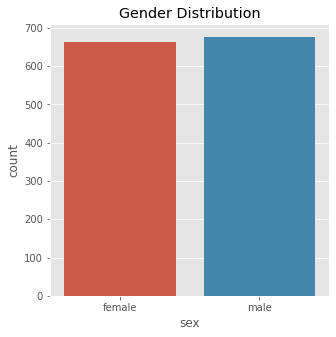

In [ ]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

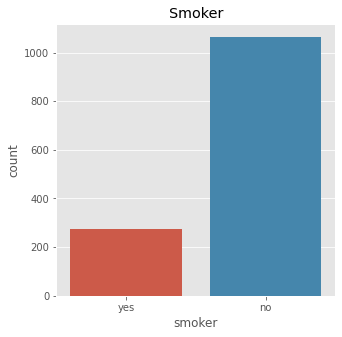

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

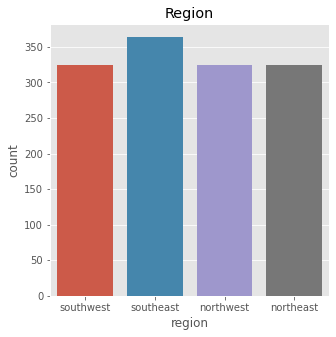

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Charges for smokers')

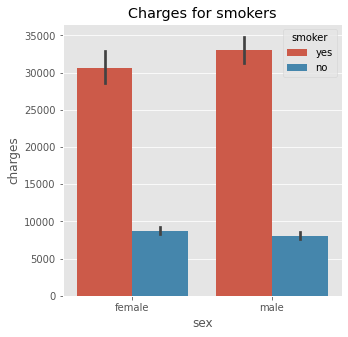

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

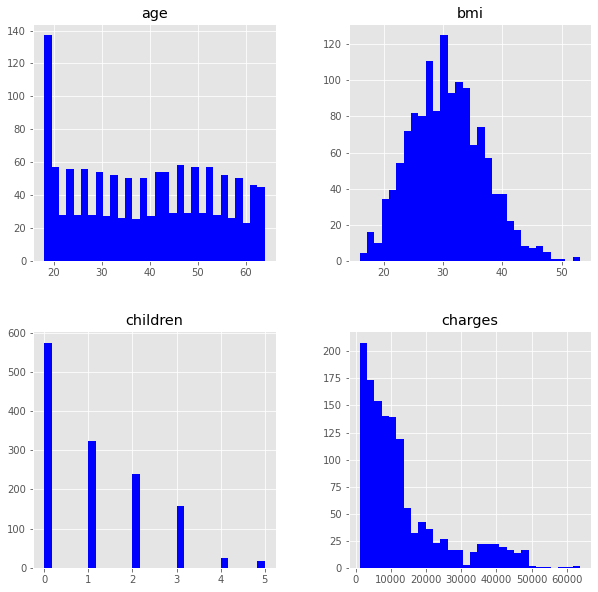

In [ ]:
df[['age','bmi','children','charges','sex','smoker','region']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

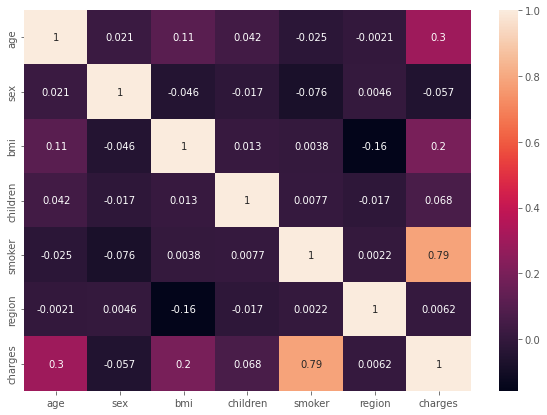

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

age            AxesSubplot(0.125,0.125;0.0945122x0.755)
sex         AxesSubplot(0.238415,0.125;0.0945122x0.755)
bmi         AxesSubplot(0.351829,0.125;0.0945122x0.755)
children    AxesSubplot(0.465244,0.125;0.0945122x0.755)
smoker      AxesSubplot(0.578659,0.125;0.0945122x0.755)
region      AxesSubplot(0.692073,0.125;0.0945122x0.755)
charges     AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

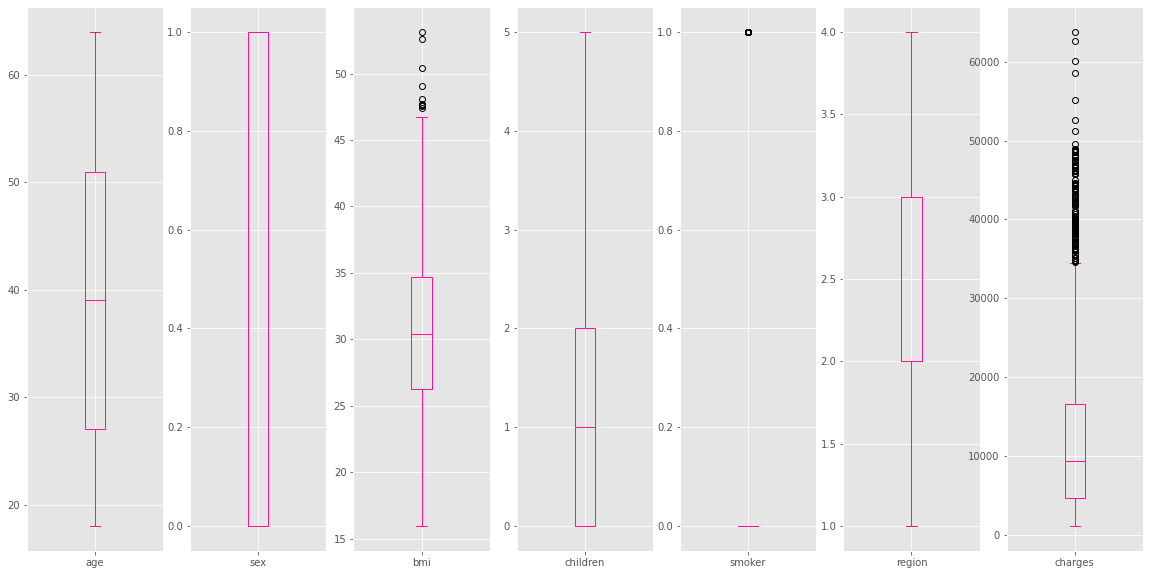

In [ ]:
df.plot(kind="box",subplots=True,sharex=False,sharey=False,figsize=(20,10),color='deeppink')

In [ ]:
X = df.drop(['charges'], axis=1)
y = df.charges

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 6)
X_test shape:  (402, 6)
y_train shape:  (936,)
y_test shape:  (402,)


In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train, y_train)
x_pred=linreg.predict(x_train)
y_pred = linreg.predict(x_test)

In [ ]:
print("train score:",linreg.score(x_train,y_train))
print("test score:",linreg.score(x_test,y_test))

train score: 0.74225713201721
test score: 0.7694415927057693


In [ ]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred))
print(f"r2 score: {r2_score(y_test,y_pred)}")
print('Adjusted R2 value= ',1 - (1 - (linreg.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,x_pred)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE=  4155.239843059382
MSE=  33805466.89868861
r2 score: 0.7694415927057693
Adjusted R2 value=  0.7663468489836991
RMSE (train)=  6144.199195801808
RMSE (test)=  5814.246890069995


In [ ]:
data = {'age':50,'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [ ]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33256.77873506]


In [ ]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train,y_train)
x_pred=regressor.predict(x_train)
y_pred=regressor.predict(x_test)
print("train score:",regressor.score(x_train,y_train))
print("test score:",regressor.score(x_test,y_test))

train score: 0.9757645677313939
test score: 0.852850623382297


In [ ]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred))
print(f"r2 score: {r2_score(y_test,y_pred)}")
print('Adjusted R2 value= ',1 - (1 - (regressor.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,x_pred)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE=  2517.499883804976
MSE=  21575675.503622804
r2 score: 0.852850623382297
Adjusted R2 value=  0.8508754639646097
RMSE (train)=  1884.0713429398643
RMSE (test)=  4644.962379139663


In [ ]:
data = {'age':50,'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [ ]:
cost_pred = regressor.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred[0])

The medical insurance cost of the new customer is:  24027.76369299999


In [ ]:
# Fitting Decision Tree Regression to the dataset
regressordt = DecisionTreeRegressor()
regressordt.fit(x_train,y_train)
x_pred=regressordt.predict(x_train)
y_pred=regressordt.predict(x_test)
print("train score:",regressordt.score(x_train,y_train))
print("test score:",regressordt.score(x_test,y_test))

train score: 1.0
test score: 0.7303510159225248


In [ ]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred))
print(f"r2 score: {r2_score(y_test,y_pred)}")
print('Adjusted R2 value= ',1 - (1 - (regressordt.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,x_pred)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE=  2872.453503106965
MSE=  39537095.66471404
r2 score: 0.7303510159225248
Adjusted R2 value=  0.7267315664718205
RMSE (train)=  0.0
RMSE (test)=  6287.853025056648


In [ ]:
kf=KFold(n_splits=7)
kf

KFold(n_splits=7, random_state=None, shuffle=False)

In [ ]:
for train_index,test_index in kf.split(['age','sex','bmi','children','smoker','region','charges']):
    print(train_index,test_index)

[1 2 3 4 5 6] [0]
[0 2 3 4 5 6] [1]
[0 1 3 4 5 6] [2]
[0 1 2 4 5 6] [3]
[0 1 2 3 5 6] [4]
[0 1 2 3 4 6] [5]
[0 1 2 3 4 5] [6]


In [ ]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [ ]:
get_score(LinearRegression(),x_train,x_test,y_train,y_test)

0.7694415927057693

In [ ]:
get_score(RandomForestRegressor(n_estimators = 100),x_train,x_test,y_train,y_test)

0.8543508496365491

In [ ]:
get_score(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

0.712966119116667